In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from multiprocessing import Pool
from pathlib import Path
import sys

# set path to the utils
notebook_dir = os.getcwd()
notebook_name = "check_generated_data.ipynb"

PATH = Path(notebook_dir) / Path(notebook_name) 

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths
setup_project_paths(PATH)

from utils_plotting import plot_time_series_data, plot_random_monthly_and_yearly_data
from utils_annual_aggregation import aggregate_monthly_to_yearly
from utils_feature_eng_per_100k import feature_eng_fat_per_100k
#from utils_cumulative_distribution import calculate_global_cumulative_distribution
from utils_global_probabilities import calculate_global_probabilities
from utils_country_probabilities import calculate_all_country_probabilities
from utils_return_periods import calculate_return_periods
from utils_check_expected_features import check_expected_features     

In [2]:
print(np.__version__) # 1.26.4 used
print(pd.__version__) # 2.2.1 used
print(matplotlib.__version__) # 3.8.4 used
print(sns.__version__) # 0.13.2 used

1.26.4
2.2.1
3.8.4
0.13.2


In [3]:
# load save minimal dataframes and check the expected feature agian
df_monthly = pd.read_pickle("/home/simon/Documents/scripts/VIEWS_FAO_index/data/processed/pilot_return_periods_monthly.pkl")
df_yearly = pd.read_pickle("/home/simon/Documents/scripts/VIEWS_FAO_index/data/processed/pilot_return_periods_yearly.pkl")

In [ ]:
plot_random_monthly_and_yearly_data(df_monthly, df_yearly_minimal_test, feature = feature, year= 1994, lock_first_month = True, save_plot = True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_series(df, country_id, feature, time_periods=None):
    """
    Plots time series data for a given feature and country.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    country_id (int): The country ID to filter the data.
    feature (str): The feature/column to plot.
    time_periods (list, optional): List of time periods to plot. Defaults to all periods.

    Returns:
    None
    """
    # Filter by country_id
    df_filtered = df[df['country_id'] == country_id]

    # Filter by time_periods if provided
    if time_periods is not None:
        df_filtered = df_filtered[df_filtered['time_period'].isin(time_periods)]

    # Aggregate data by summing the feature over time periods
    df_aggregated = df_filtered.groupby('time_period')[feature].sum().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_aggregated['time_period'], df_aggregated[feature], marker='o', linestyle='-')
    plt.title(f'Time Series Plot for {feature} (Country ID: {country_id})')
    plt.xlabel('Time Period')
    plt.ylabel(feature)
    plt.grid(True)
    plt.legend([feature])
    plt.show()

# Example usage:
# df = pd.read_csv('your_data.csv')
# plot_time_series(df, country_id=1, feature='your_feature')

In [4]:
def plot_time_series_data(df, time_ids, time_id_name, columns, figsize=(18, 25), cmap="rainbow", alpha=0.6, marker='.', s=6):
    """
    Plots a grid of scatter plots for specified time_ids and columns.

    Parameters:
    - df: pandas DataFrame containing the data
    - time_ids: list of time_ids to plot (e.g., months, years, weeks)
    - time_id_name: name of the time_id column (e.g 'month_id', 'year_id', 'week_id')
    - columns: list of columns to plot
    - figsize: tuple specifying the figure size
    - cmap: colormap for the scatter plots
    - alpha: transparency level of the markers
    - marker: marker style for the scatter plots
    - s: size of the markers
    """
    
    # Create a subplot grid
    fig, axes = plt.subplots(nrows=len(columns), ncols=len(time_ids), figsize=figsize)

    # Iterate over the rows and columns to create each subplot
    for i, col in enumerate(columns):

        # if the columns name includes "likelihood" we the reverse the colormap
        if "likelihood" in col:
            cmap_suffix = "_r"

        else:
            cmap_suffix = ""

        for j, time_id in enumerate(time_ids):
            ax = axes[i, j]
            filtered_df = df[df[time_id_name] == time_id]
            scatter = ax.scatter(filtered_df["col"], filtered_df["row"], c=filtered_df[col], cmap=f'{cmap}{cmap_suffix}', alpha=alpha, marker=marker, s=s)
            
            # Add a color bar if the value is a float
            if filtered_df[col].dtype == "float64":
                cbar = plt.colorbar(scatter, ax=ax)
                cbar.set_label(col)
            
            # Add labels and title
            ax.set_xlabel('Column')
            ax.set_ylabel('Row')
            ax.set_title(f'{col} for Time ID {time_id}')
            
            # Add grid
            ax.grid(True, linestyle='--', alpha=0.5)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

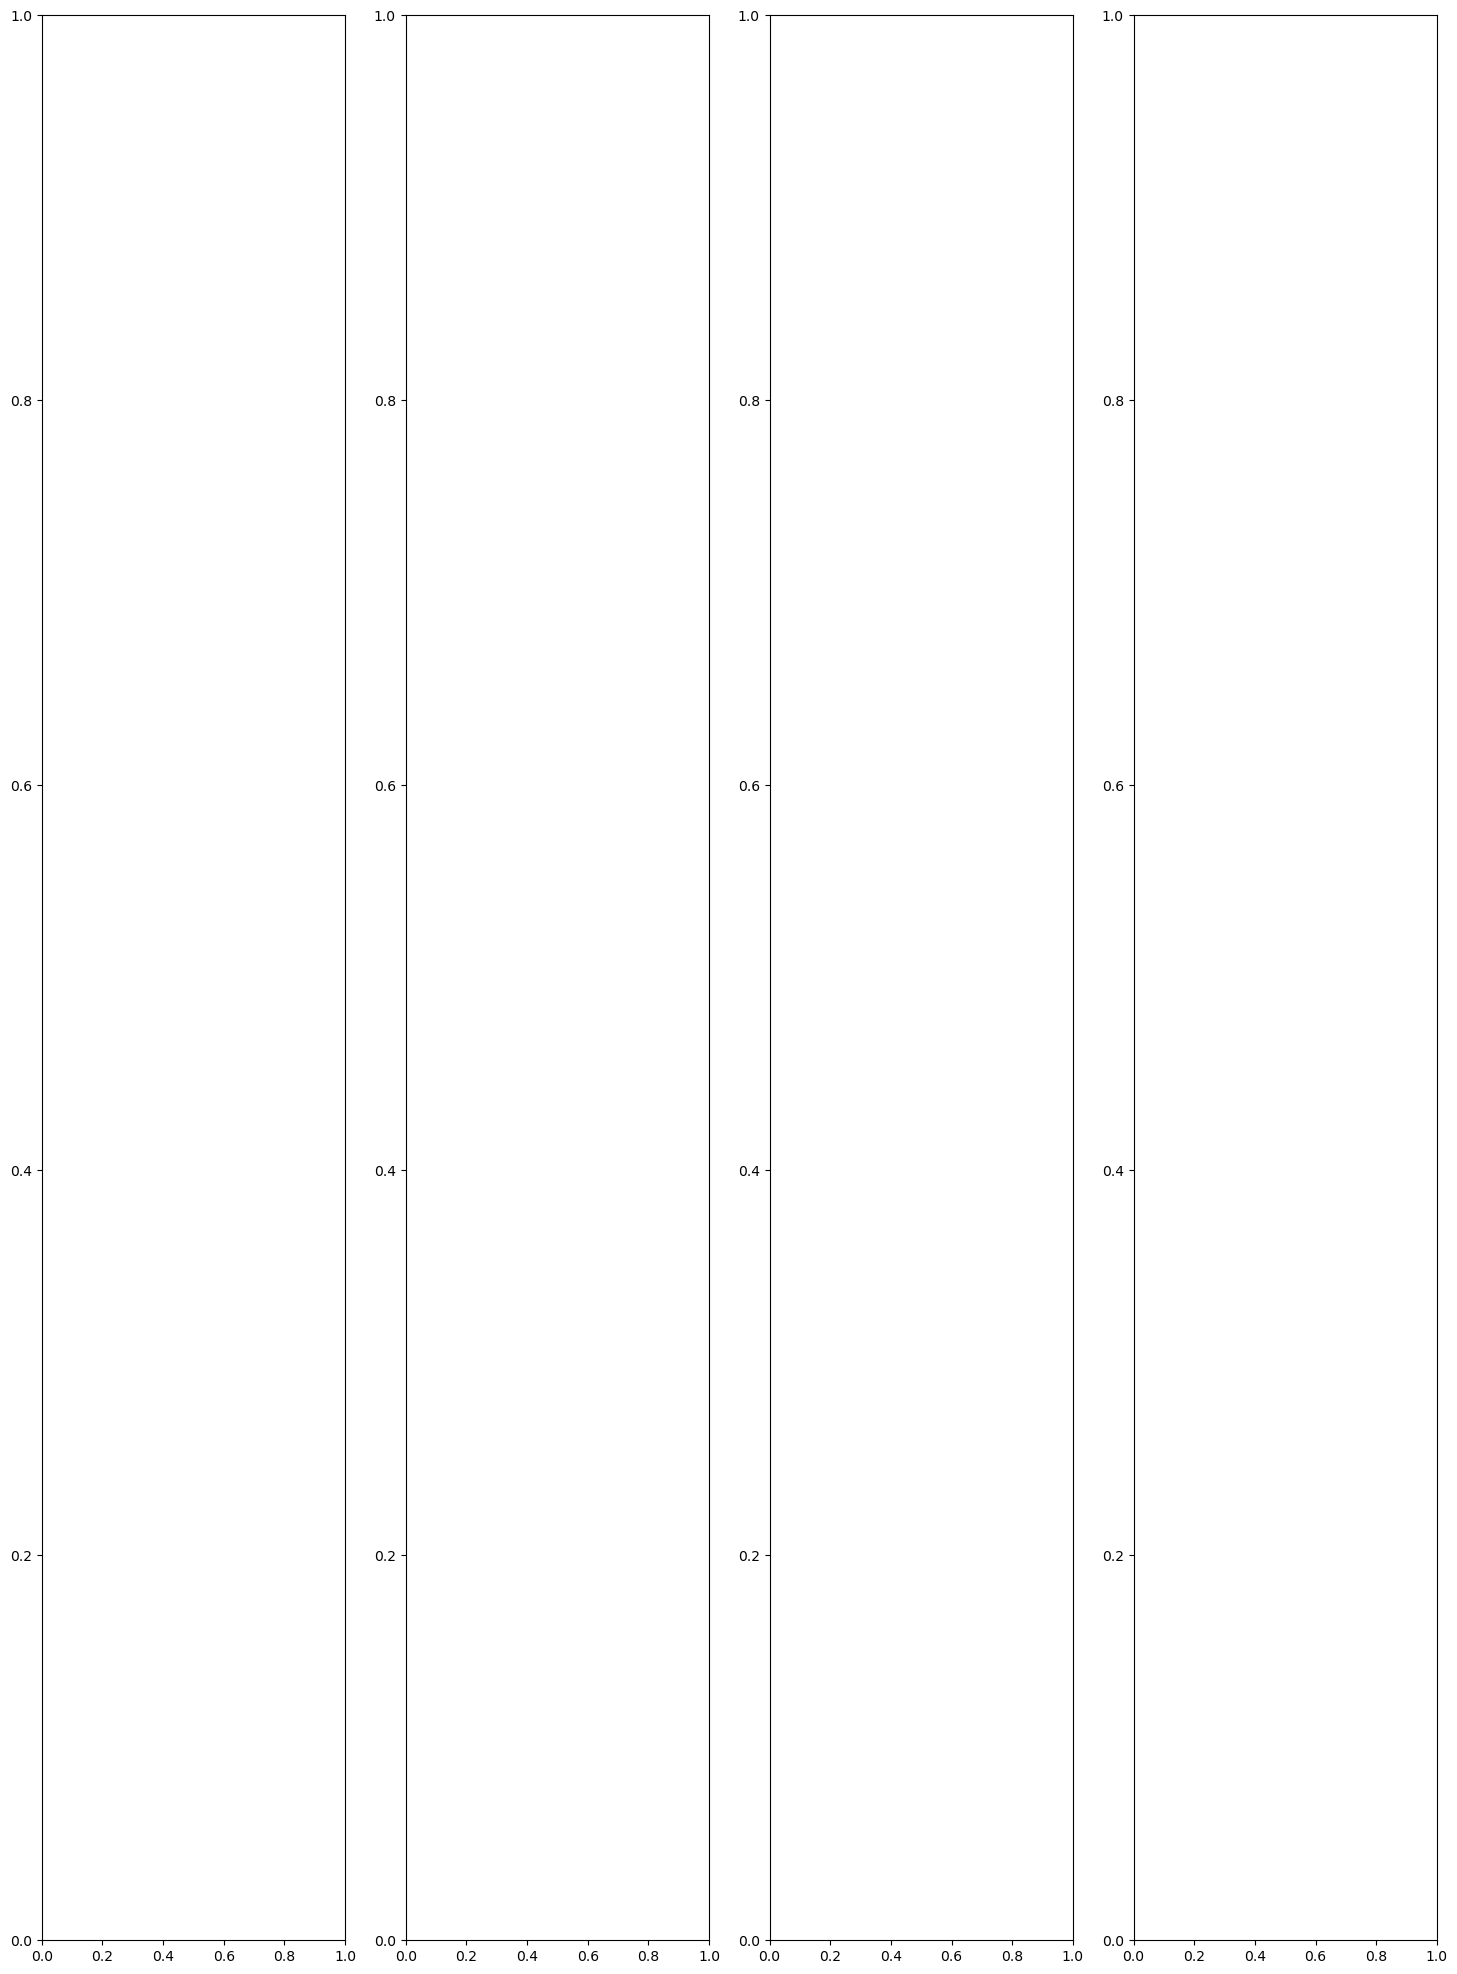

In [9]:
plot_time_series_data(df_monthly, [1,2,3,4], 'month_id', ["fatalities_per_100k"])